In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("employee.csv")
df

,Department,Job_Role,Work_Location,Has_Certification,Completed_Training,Team_Spirit,Work_Quality,Attendance,Communication_Skill,Punctual,Performance_Rating,Promoted
0,Sales,Analyst,Onsite,Yes,Yes,Low,Medium,Low,Weak,Yes,Poor,No
1,HR,Analyst,Onsite,No,No,Medium,Medium,High,Weak,No,Excellent,Yes
2,HR,Manager,Remote,No,No,High,High,Low,Strong,Yes,Poor,No
3,Marketing,Analyst,Onsite,Yes,Yes,Medium,Low,High,Average,Yes,Average,Yes
4,IT,Assistant,Hybrid,No,Yes,Medium,High,Low,Weak,Yes,Average,No
...,...,...,...,...,...,...,...,...,...,...,...,...
995,HR,Developer,Onsite,Yes,Yes,Medium,High,Low,Average,No,Poor,No
996,Finance,Assistant,Onsite,No,Yes,Low,Low,Low,Strong,Yes,Average,Yes
997,Sales,Developer,Onsite,Yes,No,Medium,Low,Low,Strong,Yes,Poor,No
998,Finance,Executive,Onsite,Yes,Yes,High,Low,Medium,Strong,Yes,Good,No


In [3]:
label=LabelEncoder()
df["Department"]=label.fit_transform(df["Department"])
df["Job_Role"]=label.fit_transform(df["Job_Role"])
df["Work_Location"]=label.fit_transform(df["Work_Location"])
df["Has_Certification"]=label.fit_transform(df["Has_Certification"])
df["Completed_Training"]=label.fit_transform(df["Completed_Training"])
df["Team_Spirit"]=label.fit_transform(df["Team_Spirit"])
df["Work_Quality"]=label.fit_transform(df["Work_Quality"])
df["Attendance"]=label.fit_transform(df["Attendance"])
df["Communication_Skill"]=label.fit_transform(df["Communication_Skill"])
df["Punctual"]=label.fit_transform(df["Punctual"])
df["Performance_Rating"]=label.fit_transform(df["Performance_Rating"])
df["Promoted"]=label.fit_transform(df["Promoted"])
df

,Department,Job_Role,Work_Location,Has_Certification,Completed_Training,Team_Spirit,Work_Quality,Attendance,Communication_Skill,Punctual,Performance_Rating,Promoted
0,4,0,1,1,1,1,2,1,2,1,3,0
1,1,0,1,0,0,2,2,0,2,0,1,1
2,1,4,2,0,0,0,0,1,1,1,3,0
3,3,0,1,1,1,2,1,0,0,1,0,1
4,2,1,0,0,1,2,0,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,2,1,1,1,2,0,1,0,0,3,0
996,0,1,1,0,1,1,1,1,1,1,0,1
997,4,2,1,1,0,2,1,1,1,1,3,0
998,0,3,1,1,1,0,1,2,1,1,2,0


In [4]:
x=df.drop("Promoted",axis=1) #features
y=df["Promoted"] # target

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [6]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [7]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1])

In [8]:
accuracy=accuracy_score(y_pred,y_test)
accuracy
print(f"accuracy score:{accuracy*100:0.2f}%")

accuracy score:47.50%


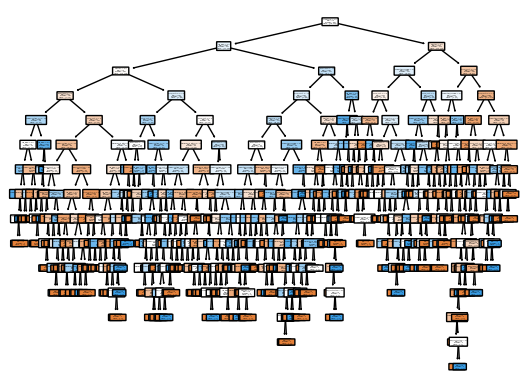

In [9]:
plot_tree(model,filled=True,rounded=True,feature_names=x.columns,class_names=["Not Promoted","Promoted"])
plt.show()

array([1])